In [1]:
# import the necsaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Skewness of the 'fare' column

4.787316519674893


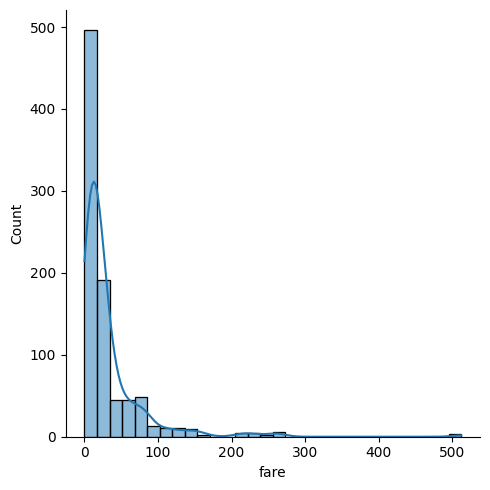

In [3]:
print(df['fare'].skew())
sns.displot(df['fare'], kde=True, bins=30)

In [4]:
print(max(df['fare']))
print(min(df['fare']))

512.3292
0.0


In [5]:
df['fare_log'] = np.log(df['fare'])
print(df['fare_log'].skew())

nan


ValueError: supplied range of [-inf, 6.238967387173662] is not finite

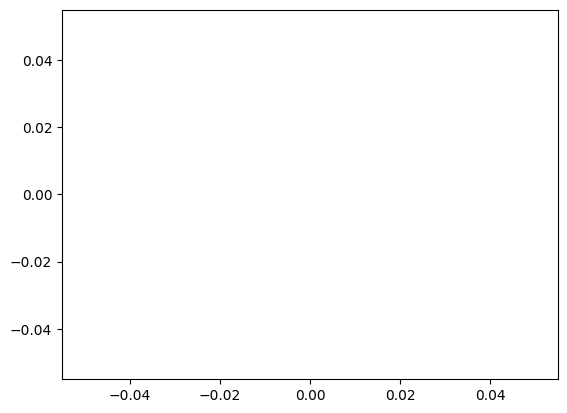

In [6]:
sns.distplot(df['fare_log'], kde=True, bins=30)

In [7]:
# rows with 0 fare
df[df['fare']==0]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,fare_log
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,-inf
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True,-inf
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True,-inf
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,-inf
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,-inf
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,-inf
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,-inf
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True,-inf
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True,-inf
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True,-inf


### The effect of Log and BoxCox transformation on 0 

In [8]:
arr1 = [2,3,4,11,6,21,0,10,8,22,0] #list of integers
arr2 = [2.3,3.1,4.0,11.3,6.1,21.8,0.0,10.7,8.8,22.9,0.0] #list of floats

In [9]:
print('Skewness of array 1 --->',pd.Series(arr1).skew())
print('Skewness of array 2 --->',pd.Series(arr2).skew())

Skewness of array 1 ---> 1.0055113680600276
Skewness of array 2 ---> 0.9853065067611686


In [10]:
np.log(arr1)

array([0.69314718, 1.09861229, 1.38629436, 2.39789527, 1.79175947,
       3.04452244,       -inf, 2.30258509, 2.07944154, 3.09104245,
             -inf])

In [11]:
pd.Series(np.log(arr1)).skew()

nan

In [12]:
np.log(arr2)

array([0.83290912, 1.13140211, 1.38629436, 2.42480273, 1.80828877,
       3.08190997,       -inf, 2.37024374, 2.17475172, 3.13113691,
             -inf])

In [13]:
pd.Series(np.log(arr2)).skew()

nan

In [15]:
from scipy import stats

In [14]:
stats.boxcox(arr1)

ValueError: Data must be positive.

In [15]:
stats.boxcox(arr2)

ValueError: Data must be positive.

### Method - 1

**Square Root Transformation**

2.08500441820235


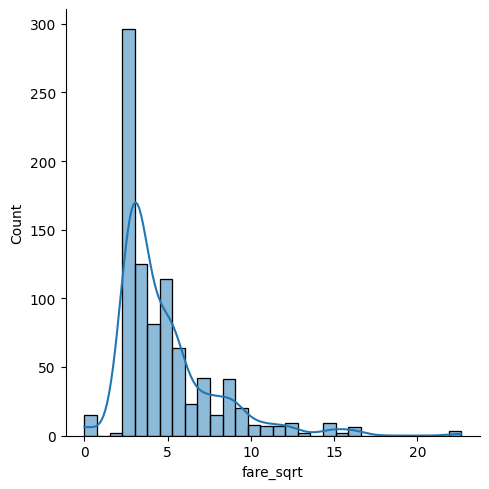

In [16]:
df['fare_sqrt'] = np.sqrt(df['fare'])
print(df['fare_sqrt'].skew())
sns.displot(df['fare_sqrt'], kde=True, bins=30)

### Method - 2

Replacing zeros with nans

In [20]:
df['fare_nans'] = df['fare'].replace(0, np.nan)
print('number of zeros in fare columns ->', df[df['fare']==0]['fare'].count())
print('number of zeros in fare_nans columns ->', df[df['fare_nans']==0]['fare_nans'].count())
print('number of nans in fare_nans columns ->', df['fare_nans'].isna().sum())

number of zeros in fare columns -> 15
number of zeros in fare_nans columns -> 0
number of nans in fare_nans columns -> 15


0.9012719215598877


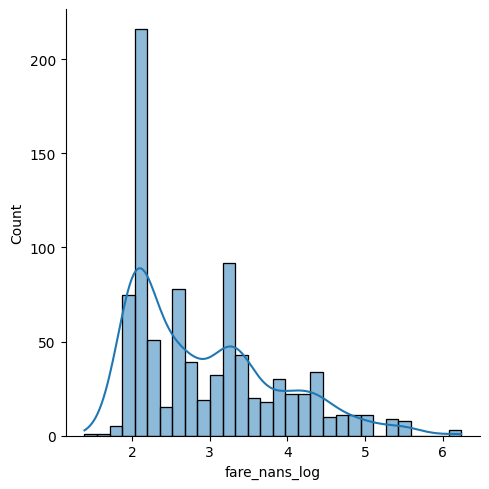

In [21]:
df['fare_nans_log'] = np.log(df['fare_nans'])
print(df['fare_nans_log'].skew())
sns.displot(df['fare_nans_log'], kde=True, bins=30)

0.44310881405404506


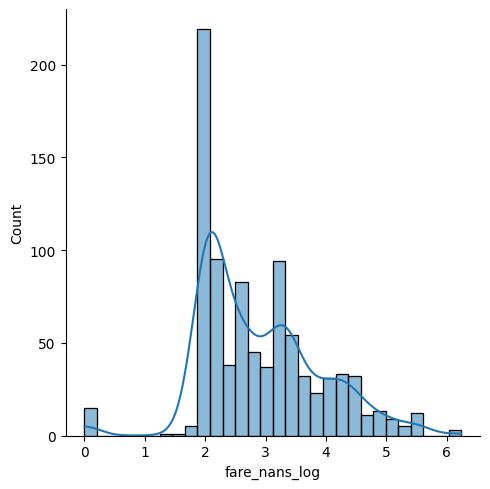

In [27]:
# replacing the nans back to zeros
df['fare_nans_log'] = df['fare_nans_log'].replace(np.nan, 0)
print(df['fare_nans_log'].skew())
sns.displot(df['fare_nans_log'], kde=True, bins=30)

17.028526304329088


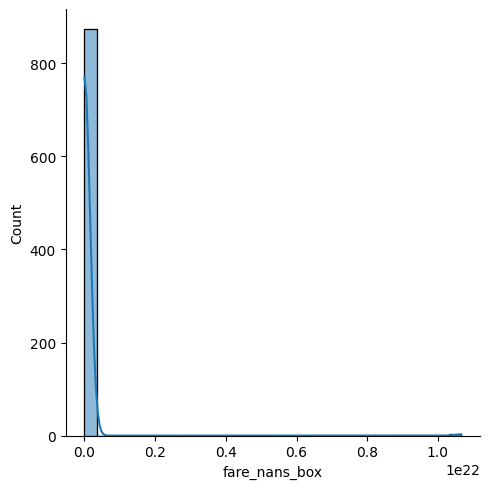

In [22]:
# applying boxcox transformation
df['fare_nans_box'] = stats.boxcox(df['fare_nans'])[0]
print(df['fare_nans_box'].skew())
sns.displot(df['fare_nans_box'], kde=True, bins=30)

### The effect of Log and BoxCox transformation on nan

In [9]:
nan_arr1 = [2,3,4,11,6,21,np.nan,10,8,22,np.nan] #list of integers
nan_arr2 = [2.3,3.1,4.0,11.3,6.1,21.8,np.nan,10.7,8.8,22.9,np.nan] #list of floats

In [10]:
np.log(nan_arr1)

array([0.69314718, 1.09861229, 1.38629436, 2.39789527, 1.79175947,
       3.04452244,        nan, 2.30258509, 2.07944154, 3.09104245,
              nan])

In [11]:
np.log(nan_arr2)

array([0.83290912, 1.13140211, 1.38629436, 2.42480273, 1.80828877,
       3.08190997,        nan, 2.37024374, 2.17475172, 3.13113691,
              nan])

In [12]:
pd.Series(np.log(nan_arr1)).skew()

-0.132092357280846

In [13]:
pd.Series(np.log(nan_arr2)).skew()

-0.0720403763617007

In [16]:
stats.boxcox(nan_arr1)

(array([4.17974126e+01, 1.30077971e+03, 1.48846169e+04, 7.84923537e+07,
        4.61966045e+05, 1.87944027e+10,            nan, 3.50060333e+07,
        5.28576805e+06, 2.78736832e+10,            nan]),
 8.472135811722177)

In [17]:
stats.boxcox(nan_arr2)

(array([1.36848493e+02, 1.71735566e+03, 1.48846169e+04, 9.85895045e+07,
        5.31407909e+05, 2.57983709e+10,            nan, 6.20992360e+07,
        1.18520249e+07, 3.91487571e+10,            nan]),
 8.472135811722177)

In [18]:
pd.Series(stats.boxcox(nan_arr1)[0]).skew()

1.8169507597114973

In [19]:
pd.Series(stats.boxcox(nan_arr2)[0]).skew()

1.8379611673397331

### Method - 3

Adding 1 to the column

In [24]:
df['fare_ones'] = df['fare']+1
print('number of zeros in fare columns ->', df[df['fare']==0]['fare'].count())
print('number of zeros in fare_ones columns ->', df[df['fare_ones']==0]['fare_ones'].count())
print('number of nans in fare_ones columns ->', df['fare_ones'].isna().sum())
print('number of ones in fare_ones columns ->', df[df['fare_ones']==1]['fare_ones'].count())

number of zeros in fare columns -> 15
number of zeros in fare_ones columns -> 0
number of nans in fare_ones columns -> 0
number of ones in fare_ones columns -> 15


0.3949280095189306


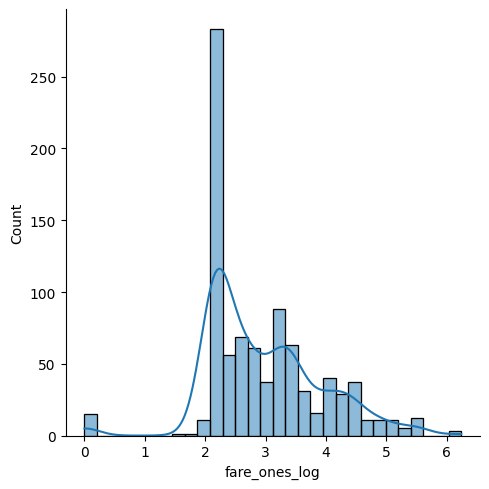

In [30]:
df['fare_ones_log'] = np.log(df['fare_ones'])
print(df['fare_ones_log'].skew())
sns.displot(df['fare_ones_log'], kde=True, bins=30)

-0.040329182758763044


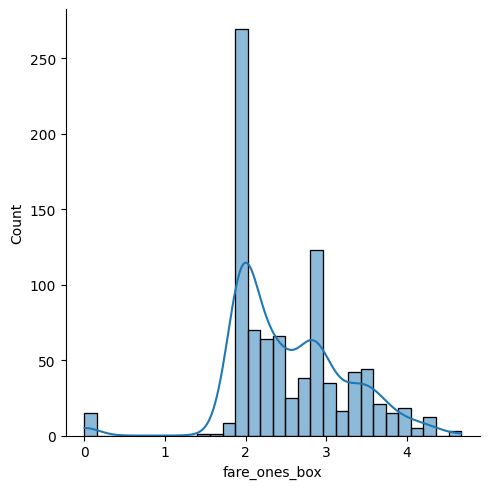

In [32]:
df['fare_ones_box'] = stats.boxcox(df['fare_ones'])[0]
print(df['fare_ones_box'].skew())
sns.displot(df['fare_ones_box'], kde=True, bins=30)